# SVD Applied to a Word-Document Matrix

This notebook applies the SVD to a simple word-document matrix. The aim is to see what the reconstructed reduced dimension matrix looks like.

In [1]:
#import pandas for conviently labelled arrays
import pandas
# import numpy for SVD function
import numpy
# import matplotlib.pyplot for visualising arrays
import matplotlib.pyplot as plt

## A Simple Word-Document Matrix
The example word-document matrix is taken from http://makeyourowntextminingtoolkit.blogspot.co.uk/2016/11/so-many-dimensions-and-how-to-reduce.html

In [2]:
# create a simple word-document matrix as a pandas dataframe, the content values have been normalised
words = ['wheel', ' seat', ' engine', ' slice', ' oven', ' boil']
print(words)
documents = ['doc1', 'doc2', 'doc3', 'doc4', 'doc5', 'doc6']
word_doc = pandas.DataFrame([[0.5,0.3333, 0.25, 0, 0, 0],
                      [0.25, 0.3333, 0, 0, 0, 0],
                      [0.25, 0.3333, 0.75, 0,0,0],
                      [0, 0, 0, 0.5, 0.5, 0.6],
                      [0, 0, 0, 0.3333, 0.1667, 0],
                      [0, 0, 0, 0.1667, 0.3333, 0.4]], index=words, columns=documents)
# and show it
word_doc

['wheel', ' seat', ' engine', ' slice', ' oven', ' boil']


,doc1,doc2,doc3,doc4,doc5,doc6
wheel,0.50,0.3333,0.25,0.0000,0.0000,0.0
seat,0.25,0.3333,0.00,0.0000,0.0000,0.0
engine,0.25,0.3333,0.75,0.0000,0.0000,0.0
slice,0.00,0.0000,0.00,0.5000,0.5000,0.6
oven,0.00,0.0000,0.00,0.3333,0.1667,0.0
boil,0.00,0.0000,0.00,0.1667,0.3333,0.4


## Word-Document matrix is A

In [3]:
# create a numpy array from the pandas dataframe
A = word_doc.values

## Word-Word Correlation Matrix is A.A*

In [4]:
pandas.DataFrame(numpy.dot(A, A.T), index=words, columns=words)

,wheel,seat,engine,slice,oven,boil
wheel,0.423589,0.236089,0.423589,0.00,0.000000,0.000000
seat,0.236089,0.173589,0.173589,0.00,0.000000,0.000000
engine,0.423589,0.173589,0.736089,0.00,0.000000,0.000000
slice,0.000000,0.000000,0.000000,0.86,0.250000,0.490000
oven,0.000000,0.000000,0.000000,0.25,0.138878,0.111122
boil,0.000000,0.000000,0.000000,0.49,0.111122,0.298878


# Document-Document Correlation Matrix is A*.A

In [5]:
pandas.DataFrame(numpy.dot(A.T, A), index=documents, columns=documents)

,doc1,doc2,doc3,doc4,doc5,doc6
doc1,0.3750,0.333300,0.3125,0.000000,0.000000,0.00000
doc2,0.3333,0.333267,0.3333,0.000000,0.000000,0.00000
doc3,0.3125,0.333300,0.6250,0.000000,0.000000,0.00000
doc4,0.0000,0.000000,0.0000,0.388878,0.361122,0.36668
doc5,0.0000,0.000000,0.0000,0.361122,0.388878,0.43332
doc6,0.0000,0.000000,0.0000,0.366680,0.433320,0.52000


## Now Take the SVD

In [6]:
# break it down into an SVD
U, s, VT = numpy.linalg.svd(A, full_matrices=False)
S = numpy.diag(s)

In [7]:
# what are U, S and V
print("U =\n", numpy.round(U, decimals=2), "\n")
print("S =\n", numpy.round(S, decimals=2), "\n")
print("V^T =\n", numpy.round(VT, decimals=2), "\n")

U =
 [[ 0.   -0.57 -0.52  0.   -0.64  0.  ]
 [ 0.   -0.29 -0.6   0.    0.75  0.  ]
 [ 0.   -0.77  0.61  0.    0.2   0.  ]
 [-0.84  0.    0.    0.    0.   -0.54]
 [-0.25  0.    0.   -0.89  0.    0.38]
 [-0.48  0.    0.    0.45  0.    0.75]] 

S =
 [[ 1.1   0.    0.    0.    0.    0.  ]
 [ 0.    1.06  0.    0.    0.    0.  ]
 [ 0.    0.    0.45  0.    0.    0.  ]
 [ 0.    0.    0.    0.29  0.    0.  ]
 [ 0.    0.    0.    0.    0.13  0.  ]
 [ 0.    0.    0.    0.    0.    0.05]] 

V^T =
 [[ 0.    0.    0.   -0.53 -0.56 -0.63]
 [-0.52 -0.51 -0.68  0.    0.    0.  ]
 [-0.57 -0.38  0.72  0.    0.    0.  ]
 [ 0.    0.    0.   -0.77  0.01  0.64]
 [-0.63  0.77 -0.1   0.    0.    0.  ]
 [-0.   -0.   -0.   -0.35  0.83 -0.44]] 



We can see above that the values in the diagonal **S** matrix are ordered by magnitide. There is a significant different between the biggest value 1.1, and the smallest 0.05. The halfway value of 0.28 is still much smaller than the largest.

## Check U, S and V Do Actually Reconstruct A

In [8]:
# rebuild A2 from U.S.V
A2 = numpy.dot(U,numpy.dot(S,VT))
print("A2 =\n", numpy.round(A2, decimals=2))

A2 =
 [[ 0.5   0.33  0.25 -0.    0.    0.  ]
 [ 0.25  0.33  0.    0.    0.    0.  ]
 [ 0.25  0.33  0.75  0.    0.    0.  ]
 [ 0.    0.    0.    0.5   0.5   0.6 ]
 [ 0.    0.    0.    0.33  0.17 -0.  ]
 [ 0.    0.    0.    0.17  0.33  0.4 ]]


Yes, that worked .. the reconstructed A2 is the same as the original A (within the bounds of small floating point accuracy)

## Now Reduce Dimensions, Extract Topics
Here we use only the top 2 values of the **S** singular value matrix, pretty brutal reduction in dimensions!

In [9]:
# S_reduced is the same as S but with only 
S_reduced = numpy.zeros_like(S)
# only keep top two eigenvalues
l = 2
S_reduced[:l, :l] = S[:l,:l]
# show S_rediced which has less info than original S
print("S_reduced =\n", numpy.round(S_reduced, decimals=2))

S_reduced =
 [[ 1.1   0.    0.    0.    0.    0.  ]
 [ 0.    1.06  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]]


## reduced view of documents

In [10]:
# what is the document matrix now?
S_reduced_VT = numpy.dot(S_reduced, VT)
print("S_reduced_VT = \n", numpy.round(S_reduced_VT, decimals=2))

S_reduced_VT = 
 [[ 0.    0.    0.   -0.58 -0.62 -0.7 ]
 [-0.55 -0.54 -0.72  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]]


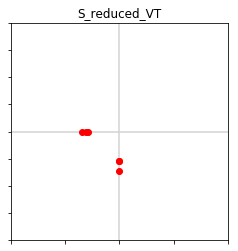

In [11]:
# plot the array
p = plt.subplot(111)
p.axis('scaled'); p.axis([-2, 2, -2, 2]); p.axhline(y=0, color='lightgrey'); p.axvline(x=0, color='lightgrey')
p.set_yticklabels([]); p.set_xticklabels([])

p.set_title("S_reduced_VT")
p.plot(S_reduced_VT[0,],S_reduced_VT[1,],'ro')

plt.show()

The above shows that there are 2 clusters of documents. That matches our expectations as we constructed the example data set that way.

## extract topics by looking at the reduced view of the words

In [12]:
# new axes are ... a linrar combination of previous words ...
U_S_reduced = numpy.dot(U, S_reduced)
pandas.DataFrame(numpy.round(U_S_reduced, decimals=2), index=words)

,0,1,2,3,4,5
wheel,0.00,-0.60,0.0,0.0,0.0,0.0
seat,0.00,-0.30,0.0,0.0,0.0,0.0
engine,0.00,-0.81,0.0,0.0,0.0,0.0
slice,-0.93,0.00,0.0,0.0,0.0,0.0
oven,-0.27,0.00,0.0,0.0,0.0,0.0
boil,-0.53,0.00,0.0,0.0,0.0,0.0


The above shows that the 2 new axes are linear combinations of existing words:
* **topic 1** is mostly **slice** and some **boil**
* **topic 2** is mostly **engine** and some **wheel**